In [1]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

your 131072x1 screen size is bogus. expect trouble
23/05/21 15:43:46 WARN Utils: Your hostname, DESKTOP-QQKQ81M resolves to a loopback address: 127.0.1.1; using 172.31.131.214 instead (on interface eth0)
23/05/21 15:43:46 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/21 15:43:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
# !wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
# !mv rows.csv\?accessType\=DOWNLOAD data/chicago_crime_data.csv

In [7]:
from pyspark.sql.functions import to_timestamp, col, lit
df = spark.read.csv('../data/chicago_crime_data.csv', header=True).withColumn('Date'), to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
df.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [8]:
df.dtypes

[('ID', 'string'),
 ('Case Number', 'string'),
 ('Date', 'timestamp'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary Type', 'string'),
 ('Description', 'string'),
 ('Location Description', 'string'),
 ('Arrest', 'string'),
 ('Domestic', 'string'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('Community Area', 'string'),
 ('FBI Code', 'string'),
 ('X Coordinate', 'string'),
 ('Y Coordinate', 'string'),
 ('Year', 'string'),
 ('Updated On', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string'),
 ('Location', 'string')]

In [9]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



## Testing Schemas

In [30]:
from pyspark.sql.types import StructField, StructType, BooleanType, TimestampType, DoubleType, IntegerType, StringType

In [105]:
labels = [
    ('ID', IntegerType()),
    ('Case Number', StringType()),
    ('Date', TimestampType()),
    ('Block', StringType()),
    ('IUCR', IntegerType()),
    ('Primary Type', StringType()),
    ('Description', StringType()),
    ('Location Description', StringType()),
    ('Arrest', BooleanType()),
    ('Domestic', BooleanType()),
    ('Beat', IntegerType()),
    ('District', IntegerType()),
    ('Ward', IntegerType()),
    ('Community Area', IntegerType()),
    ('FBI Code', StringType()),
    ('X Coordinate', IntegerType()),
    ('Y Coordinate', IntegerType()),
    ('Year', IntegerType()),
    ('Updated On', TimestampType()),
    ('Latitude', DoubleType()),
    ('Longitude', DoubleType()),
    ('Location', StringType())]

colunas = []
tipos = []
for x in labels:
    colunas.append(x[0])
    tipos.append(x[1])


In [96]:
nulos = []
for x in df.columns:
    if df.filter(col(x).isNull()).count():
        nulos.append('true')
    else:
        nulos.append('false')


In [106]:
all_together = list(zip(colunas, tipos, nulos))

In [107]:
schema = StructType([StructField(x[0], x[1], True) for x in all_together])
schema

StructType([StructField('ID', IntegerType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', IntegerType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', BooleanType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', IntegerType(), True), StructField('District', IntegerType(), True), StructField('Ward', IntegerType(), True), StructField('Community Area', IntegerType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', IntegerType(), True), StructField('Y Coordinate', IntegerType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', TimestampType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Locat

In [230]:
df = spark.read.csv('../data/chicago_crime_data.csv', schema=schema)
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: integer (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: timestamp (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [231]:
df.show(5, truncate=False)


+--------+-----------+----+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+-----------------------------+
|ID      |Case Number|Date|Block                |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude    |Longitude    |Location                     |
+--------+-----------+----+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+-----------------------------+
|null    |Case Number|null|Block                |null|Primary Type|Description            |Location Description|null  |null    |null|null    |null|null          |FBI Code|null        |nul

## Working with Columns

In [110]:
df.Description

Column<'Description'>

In [111]:
df['Description']

Column<'Description'>

In [112]:
df.select(col('Description'))

DataFrame[Description: string]

In [118]:
df.select('Description', 'Location').show(5)

+--------------------+--------------------+
|         Description|            Location|
+--------------------+--------------------+
|         Description|            Location|
|DOMESTIC BATTERY ...|(41.815117282, -8...|
|      POCKET-PICKING|(41.895080471, -8...|
|           OVER $500|                null|
|POSS: HEROIN(BRN/...|(41.937405765, -8...|
+--------------------+--------------------+
only showing top 5 rows



In [144]:
#adding a column based on another column
df = df.withColumn('DoubleColumn', 2*df['Year'])
df.select('Year', 'DoubleColumn').show(5)


+----+------------+
|Year|DoubleColumn|
+----+------------+
|null|        null|
|2015|        4030|
|2015|        4030|
|2018|        4036|
|2015|        4030|
+----+------------+
only showing top 5 rows



In [145]:
#renaming a column
df = df.withColumnRenamed('DoubleColumn', 'YearTimesTwo')
df.select('YearTimesTwo').show(5)

+------------+
|YearTimesTwo|
+------------+
|        null|
|        4030|
|        4030|
|        4036|
|        4030|
+------------+
only showing top 5 rows



In [147]:
#dropping a column
df = df.drop('YearTimesTwo')

## Working with rows

In [151]:
#filtering rows
df.filter(col('Year') > 2000).show(5)

+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+------------+-------------+--------------------+
|10224738|   HY411648|null|     043XX S WOOD ST| 486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true| 924|       9|  12|            61|     08B|     1165074|     1875917|2015|      null|41.815117282|-87.

In [152]:
#unique values
df.select('Year').distinct().show()

+----+
|Year|
+----+
|2003|
|2007|
|2018|
|2015|
|2023|
|2006|
|2022|
|2013|
|null|
|2014|
|2019|
|2004|
|2020|
|2012|
|2009|
|2016|
|2001|
|2005|
|2010|
|2011|
+----+
only showing top 20 rows



In [154]:
#sorting rows
df.orderBy(col('Year')).select('Year').show(5)

+----+
|Year|
+----+
|null|
|2001|
|2001|
|2001|
|2001|
+----+
only showing top 5 rows



In [158]:
#unique and order by
df.select('Year').distinct().orderBy(col('Year')).select('Year').show()

+----+
|Year|
+----+
|null|
|2001|
|2002|
|2003|
|2004|
|2005|
|2006|
|2007|
|2008|
|2009|
|2010|
|2011|
|2012|
|2013|
|2014|
|2015|
|2016|
|2017|
|2018|
|2019|
+----+
only showing top 20 rows



In [170]:
#appending rows
df = spark.read.csv('../data/chicago_crime_data.csv', header=True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') < lit('2018-11-11'))
print(df.count())
df2 = spark.read.csv('../data/chicago_crime_data.csv', header=True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-11'))
print(df2.count())

6756147


11


In [171]:
df = df.union(df2)
df.orderBy('Date', ascending=False).show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11504097|   JB511773|2018-11-11 00:00:00|003XX S ST LOUIS AVE|1320|   CRIMINAL DAMAGE|          TO VEHICLE|              STREET| fal

In [172]:
#top primary type of crimes
df.groupBy('Primary Type').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|1418509|
|             BATTERY|1232278|
|     CRIMINAL DAMAGE| 771517|
|           NARCOTICS| 711770|
|       OTHER OFFENSE| 418903|
|             ASSAULT| 418521|
|            BURGLARY| 388041|
| MOTOR VEHICLE THEFT| 314133|
|  DECEPTIVE PRACTICE| 267073|
|             ROBBERY| 255602|
|   CRIMINAL TRESPASS| 193371|
|   WEAPONS VIOLATION|  70665|
|        PROSTITUTION|  68327|
|PUBLIC PEACE VIOL...|  47785|
|OFFENSE INVOLVING...|  46673|
| CRIM SEXUAL ASSAULT|  26476|
|         SEX OFFENSE|  25565|
|INTERFERENCE WITH...|  15140|
|            GAMBLING|  14422|
|LIQUOR LAW VIOLATION|  14068|
+--------------------+-------+
only showing top 20 rows



In [181]:
#what is the percentage of reported crimes that resulted in an arrest?
round((df.filter(col('Arrest')=='true').count() / df.count())*100,2)

27.75

In [182]:
#what are the top 3 locations for reported crimes?
df.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770624|
|           RESIDENCE|1146054|
|           APARTMENT| 699116|
+--------------------+-------+
only showing top 3 rows



# Working with Built-in functions

In [189]:
from pyspark.sql import functions
print(dir(functions))
help(substring)

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'PythonEvalType', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Union', 'UserDefinedFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_append', 'array_compact', 'array_contains', 'array_distinct', 'array_except', 'ar

In [190]:
#Display the primary type column in lower and upper characteres, and the first 4 characteres of the column
from pyspark.sql.functions import lower, upper, substring
df.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'), 1, 4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [191]:
#show the oldest date and the most recent date
from pyspark.sql.functions import min, max
df.select(min(col('Date')), max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|
+-------------------+-------------------+



In [194]:
#what is 3 days earlier than the oldest date and 3 days later than the most recent date?
from pyspark.sql.functions import date_add, date_sub
df.select(date_sub(min(col('Date')), 3), date_add(max(col('Date')), 3)).show()

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



In [196]:
# working with dates
from pyspark.sql.functions import to_date, to_timestamp, lit

In [201]:
df = spark.createDataFrame(
    [('2019-12-25 13:30:00', )], ['Christmas']
)
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [206]:
df.select(to_date(col('Christmas')), to_timestamp(col('Christmas'))).show()

+------------------+-----------------------+
|to_date(Christmas)|to_timestamp(Christmas)|
+------------------+-----------------------+
|        2019-12-25|    2019-12-25 13:30:00|
+------------------+-----------------------+



In [207]:
df = spark.createDataFrame(
    [('25/dec/2019 13:30:00',)], ['Christmas']
)
df.show()

+--------------------+
|           Christmas|
+--------------------+
|25/dec/2019 13:30:00|
+--------------------+



In [215]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show()

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



In [218]:
df = spark.createDataFrame(
    [('12/25/2019 01:30:00 PM',)], ['Christmas']
)
df.show(1, truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [227]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a')).show()

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 13:30:00|
+-----------------------------------------+----------------------------------------------+



+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |09/05/2015 01:30:00 PM|043XX S WOOD ST      |0486|BATTERY     |DOMESTIC BAT

### Working with joins

In [4]:
from pyspark.sql.functions import to_timestamp, col, lit
df = spark.read.csv('../data/chicago_crime_data.csv', header=True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a'))
df.show(5, truncate=False)

+--------+-----------+-------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date               |Block                |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+-------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |2015-09-05 13:30:00|043XX S WOOD ST      |0486|BATTERY     |DOMESTIC BATTERY SIMPLE|

In [5]:
# !wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
# !mv police-station.csv ../data/police_station.csv

In [6]:
df2 = spark.read.csv('../data/police_station.csv', header=True)
df2.show(5, truncate=False)

+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|DISTRICT    |DISTRICT NAME|ADDRESS            |CITY   |STATE|ZIP  |WEBSITE                                                                     |PHONE       |FAX         |TTY         |X COORDINATE|Y COORDINATE|LATITUDE   |LONGITUDE   |LOCATION                       |
+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|Headquarters|Headquarters |3510 S Michigan Ave|Chicago|IL   |60653|http://home.chicagopolice.org                                               |null        |null        |null        |1177731.401 

In [7]:
#caching the dataframe
# df.cache()
# df.count()

In [9]:
df2.select(col('DISTRICT')).distinct().show()

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
+------------+
only showing top 20 rows



In [10]:
df.select(col('district')).distinct().show()

+--------+
|district|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
+--------+
only showing top 20 rows



In [11]:
#since in the crime reports have zeros at left, we need to look for a built-in function, otherwise we must create one
from pyspark.sql.functions import lpad
df2.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [12]:
#lets create a new column with this new format
df2 = df2.withColumn('DistrictPadded', lpad(col('DISTRICT'),3,'0'))
df2.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+--------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|DistrictPadded|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+--------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|           Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080

In [15]:
#lets join both dataframes to see all of the reports that are in the police station df
df.join(df2, df.District == df2.DistrictPadded, 'left_outer').show()

23/05/21 16:29:56 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+--------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|DistrictPadded

In [17]:
df2.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'DistrictPadded']

In [18]:
#too big, dropping unwanted columns
df.join(df2, df.District == df2.DistrictPadded, 'left_outer').drop(
    'ADDRESS',
    'CITY',
    'STATE',
    'ZIP',
    'WEBSITE',
    'PHONE',
    'FAX',
    'TTY',
    'X COORDINATE',
    'Y COORDINATE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION',
    'DistrictPadded').show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|      Deering|
|10224739|   HY411615|2015-09-04 11:30:00| 008XX N CENTRAL AVE|0870|    

### What is the most frequently reported non-criminal activity???

In [31]:
#a good way is to cache everything, but since I dont have enough memory...
# df.cache()
# df.count()

In [21]:
df.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [23]:
#how many distinct rows are in the primary type column?
df.select(col('Primary Type')).distinct().count()

36

In [25]:
df.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [28]:
nonCriminal = df.filter((col('Primary Type')=='NON - CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL (SUBJECT SPECIFIED)'))
nonCriminal.show(50, truncate=False)

+--------+-----------+-------------------+-----------------------+----+--------------------------------+-------------------------------------------+----------------------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date               |Block                  |IUCR|Primary Type                    |Description                                |Location Description                          |Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+-------------------+-----------------------+----+--------------------------------+-------------------------------------------+----------------------------------------------+------+--------+----+--------+----+--------------+--------+------------+-

In [30]:
# the answer for the most non criminal reported activity
nonCriminal.groupBy(col('Description')).count().orderBy('count', ascending=False).show()

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|       LOST PASSPORT|  111|
|   FOID - REVOCATION|   76|
|CONCEALED CARRY L...|   18|
|NOTIFICATION OF C...|    9|
|NOTIFICATION OF S...|    8|
|      FOUND PASSPORT|    4|
|GUN OFFENDER NOTI...|    3|
+--------------------+-----+



### Which day of the week has the most number of reported crime?

In [35]:
from pyspark.sql.functions import dayofweek, date_format
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col: 'ColumnOrName') -> pyspark.sql.column.Column
    Extract the day of the week of a given date/timestamp as integer.
    Ranges from 1 for a Sunday through to 7 for a Saturday
    
    .. versionadded:: 2.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target date/timestamp column to work on.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        day of the week for given date/timestamp as integer.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [34]:
df.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
|2018-09-01 00:01:00|              7|
|2015-09-05 12:45:00|              7|
|2015-09-05 13:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [36]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date: 'ColumnOrName', format: str) -> pyspark.sql.column.Column
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Parameters
    ----------
    date : :class:`~pyspark.sql.Column` or str
        input column of values to format.
    format: str
        format to use to represent datetime values.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        string value repres

In [37]:
df.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [39]:
df.groupBy(date_format(col('Date'), 'E')).count().orderBy('Count', ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1172028|
|                 Wed|1121927|
|                 Sat|1117579|
|                 Tue|1114778|
|                 Thu|1110655|
|                 Mon|1102136|
|                 Sun|1060726|
+--------------------+-------+



In [40]:
df.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=1060726),
 Row(date_format(Date, E)='Mon', count=1102136),
 Row(date_format(Date, E)='Thu', count=1110655),
 Row(date_format(Date, E)='Sat', count=1117579),
 Row(date_format(Date, E)='Wed', count=1121927),
 Row(date_format(Date, E)='Fri', count=1172028),
 Row(date_format(Date, E)='Tue', count=1114778)]

In [43]:
dow = [x[0] for x in df.groupBy(date_format(col('Date'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [44]:
cnt = [x[1] for x in df.groupBy(date_format(col('Date'), 'E')).count().collect()]
cnt

[1060726, 1102136, 1110655, 1117579, 1121927, 1172028, 1114778]

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
cp = pd.DataFrame({
    'dayOfWeek': dow,
    'Count': cnt
})
cp

,dayOfWeek,Count
0,Sun,1060726
1,Mon,1102136
2,Thu,1110655
3,Sat,1117579
4,Wed,1121927
5,Fri,1172028
6,Tue,1114778


Text(0.5, 1.0, 'Number of reported crimes per day of the week')

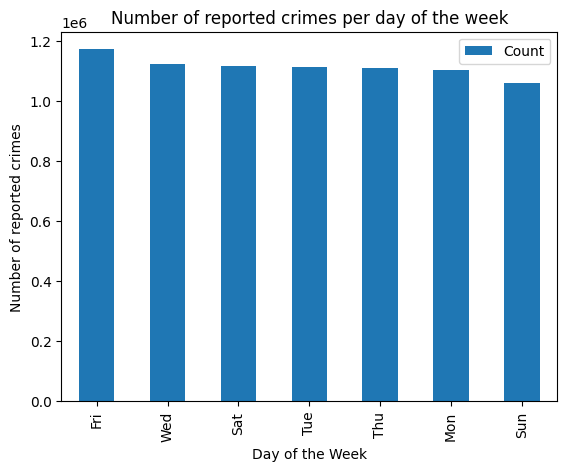

In [48]:
cp.sort_values('Count', ascending=False).plot(kind='bar', x='dayOfWeek', y='Count')
plt.xlabel('Day of the Week')
plt.ylabel('Number of reported crimes')
plt.title('Number of reported crimes per day of the week')

# Working with some RDDs

In [50]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [51]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [52]:
psrdd = sc.textFile('../data/police_station.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [53]:
ps_header = psrdd.first()

In [56]:
ps_rest = psrdd.filter(lambda line: line != ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

### how many police station are there?

In [60]:
#since we have a csv file, we can split by comma
ps_rest.map(lambda line: line.split(',')).count()

24

### display the district id, district name, address and the zip for the police station with District ID 7

In [65]:
(ps_rest.filter(lambda line: line.split(',')[0] == '7').
 map(lambda line: (line.split(',')[0],
                   line.split(',')[1],
                   line.split(',')[2],
                   line.split(',')[5])).collect()
 )

[('7', 'Englewood', '1438 W 63rd St', '60636')]

### police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code

In [66]:
(ps_rest.filter(lambda line: line.split(',')[0] in ['10', '11']).
 map(lambda line: (line.split(',')[0],
                   line.split(',')[1],
                   line.split(',')[2],
                   line.split(',')[5])).collect()
 )

[('10', 'Ogden', '3315 W Ogden Ave', '60623'),
 ('11', 'Harrison', '3151 W Harrison St', '60612')]